In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   

In [2]:
print(f"Pandas version: {pd.__version__}")

Pandas version: 1.3.5


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
covid = pd.read_csv('/content/drive/MyDrive/bda/COVID.csv')

In [5]:
covid.head(5)

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID


# Python and Pandas, data exploration

# Select your home country from the covid dataset as a new df

In [6]:
indiaData = covid.loc[covid['CountryName']=='India']
indiaData.head(5)

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
284,2020-01-30,IND,India,NaN,21.125681,82.794998,1.0,0.0,NaN,1,NaN,NaN,False,False,IN
309,2020-01-31,IND,India,NaN,21.125681,82.794998,5.0,0.0,NaN,5,NaN,NaN,False,False,IN
335,2020-02-01,IND,India,NaN,21.125681,82.794998,5.0,0.0,NaN,5,NaN,NaN,False,False,IN
362,2020-02-02,IND,India,NaN,21.125681,82.794998,2.0,0.0,NaN,2,NaN,NaN,False,False,IN
389,2020-02-03,IND,India,NaN,21.125681,82.794998,3.0,0.0,NaN,3,NaN,NaN,False,False,IN


For India dataset, all data are recorded in the same location that is same Latitude and Longitude.
There is no data for Cumulative Recovered, Hospitalized, IntensiveCare.

In [7]:
print(f'Cross-checking if other country exists:{indiaData.CountryName.unique()}')
print(f'Cross-checking if any value present in column Region:{indiaData.Region.unique()}')
print(f'Cross-checking the values present in latitude column:{indiaData.lat.unique()}')
print(f'Cross-checking the values present in logitude column:{indiaData.lon.unique()}')
print(f'Cross-checking unique values present in Intensive Care column:{indiaData.CumulativeRecovered.unique()}')
print(f'Cross-checking unique values present in Hospitalized column:{indiaData.Hospitalized.unique()}')
print(f'Cross-checking unique values present in Intensive Care:{indiaData.IntensiveCare.unique()}')

Cross-checking if other country exists:['India']
Cross-checking if any value present in column Region:[nan]
Cross-checking the values present in latitude column:[21.125681]
Cross-checking the values present in logitude column:[82.794998]
Cross-checking unique values present in Intensive Care column:[nan]
Cross-checking unique values present in Hospitalized column:[nan]
Cross-checking unique values present in Intensive Care:[nan]


In [8]:
df = indiaData.drop(columns=['iso3','CountryName','Region','lat','lon','IntensiveCare','EUcountry','EUCPMcountry','NUTS','Hospitalized','CumulativeRecovered'])

In [9]:
df.tail(5)

,Date,CumulativePositive,CumulativeDeceased,CurrentlyPositive
325526,2021-11-09,34377113.0,461389.0,33915724
325895,2021-11-10,34388579.0,461849.0,33926730
326303,2021-11-11,34401670.0,462189.0,33939481
326709,2021-11-12,34414186.0,462690.0,33951496
327434,2021-11-15,34447536.0,463655.0,33983881


CurrentlyPositive = CumulativePositive - CumulativeDeceased

##What was the worst day in your country? The worst increase of cases per day?

In [10]:
df['DailyActive'] = df['CumulativePositive'].diff()
df.tail(10)

,Date,CumulativePositive,CumulativeDeceased,CurrentlyPositive,DailyActive
323253,2021-11-02,34296237.0,458880.0,33837357,10423.0
323669,2021-11-03,34308140.0,459191.0,33848949,11903.0
324044,2021-11-04,34321025.0,459652.0,33861373,12885.0
324422,2021-11-05,34333754.0,459873.0,33873881,12729.0
325147,2021-11-08,34366987.0,461057.0,33905930,33233.0
325526,2021-11-09,34377113.0,461389.0,33915724,10126.0
325895,2021-11-10,34388579.0,461849.0,33926730,11466.0
326303,2021-11-11,34401670.0,462189.0,33939481,13091.0
326709,2021-11-12,34414186.0,462690.0,33951496,12516.0
327434,2021-11-15,34447536.0,463655.0,33983881,33350.0


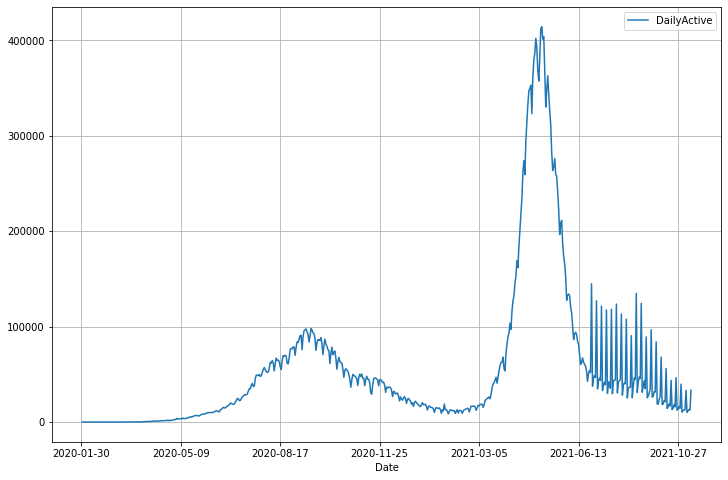

In [11]:
df.plot.line('Date', ['DailyActive'], grid = True, figsize=(12, 8))

In [12]:
start_date = '2021-03-05'
end_date = '2021-06-13'
# Select DataFrame rows between two dates
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df2 = df.loc[mask]
df2

,Date,CumulativePositive,CumulativeDeceased,CurrentlyPositive,DailyActive
207014,2021-03-06,11192088.0,157656.0,11034432,18327.0
207538,2021-03-07,11210799.0,157756.0,11053043,18711.0
208070,2021-03-08,11229398.0,157853.0,11071545,18599.0
208645,2021-03-09,11244786.0,157930.0,11086856,15388.0
209197,2021-03-10,11262707.0,158063.0,11104644,17921.0
...,...,...,...,...,...
257807,2021-06-09,29089069.0,353528.0,28735541,92596.0
258281,2021-06-10,29183121.0,359676.0,28823445,94052.0
258677,2021-06-11,29274823.0,363079.0,28911744,91702.0
259178,2021-06-12,29359155.0,367081.0,28992074,84332.0


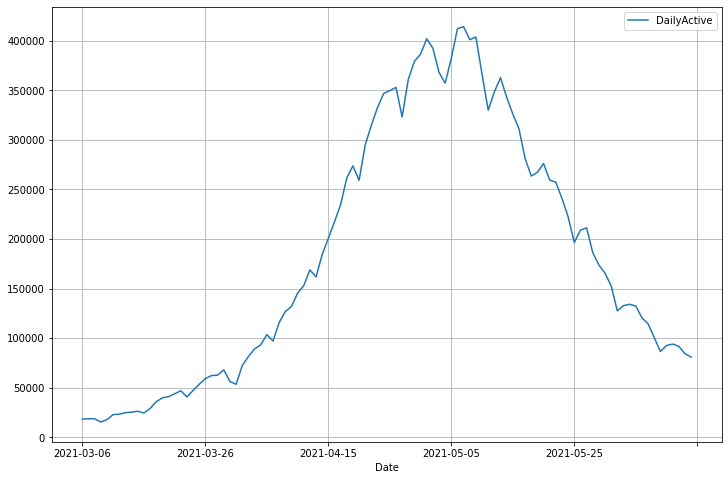

In [13]:
df2.plot.line('Date', ['DailyActive'], grid = True, figsize=(12, 8))

In [14]:
col = "DailyActive"
MostActive = df2.loc[df2[col].idxmax()]
print(f"The worst date in India is",MostActive.Date ," and the total active cases was", MostActive.DailyActive)

The worst date in India is 2021-05-07  and the total active cases was 414188.0


###The worst date in India is 2021-05-07  and the total active cases was 414188.0

## For your own country, what is the difference between summer and winter in terms of hospitalized patients?

In [15]:
# Dropping rows with null values
covid1 = covid.dropna(subset=['Hospitalized'])[['Date', 'iso3', 'CountryName', 'Region', 'lat', 'lon', 'CumulativePositive', 'CumulativeDeceased', 'CumulativeRecovered', 'CurrentlyPositive', 'Hospitalized', 'IntensiveCare', 'EUcountry', 'EUCPMcountry', 'NUTS']]

# Dropping rows will 0 in Hospitalized
covid1= covid1[covid1['Hospitalized'] != 0]

In [16]:
#Checking if we still have zero/null values in the new dataset
covid1.Hospitalized.unique()

array([1.200e+01, 2.000e+00, 9.500e+01, ..., 5.326e+03, 9.277e+03,
       5.833e+03])

In [17]:
print(f'Now the countries with hospitalized data are',covid1.CountryName.unique())

Now the countries with hospitalized data are ['Italy' 'Switzerland' 'Ireland' 'Slovenia' 'Belgium' 'Spain' 'Cyprus'
 'Austria' 'Hungary' 'Slovakia' 'Netherlands' 'Albania' 'Norway'
 'Montenegro' 'Denmark' 'Andorra']


In [18]:
#Selecting Switzerland
swissData = covid1.loc[covid1['CountryName']=='Switzerland']

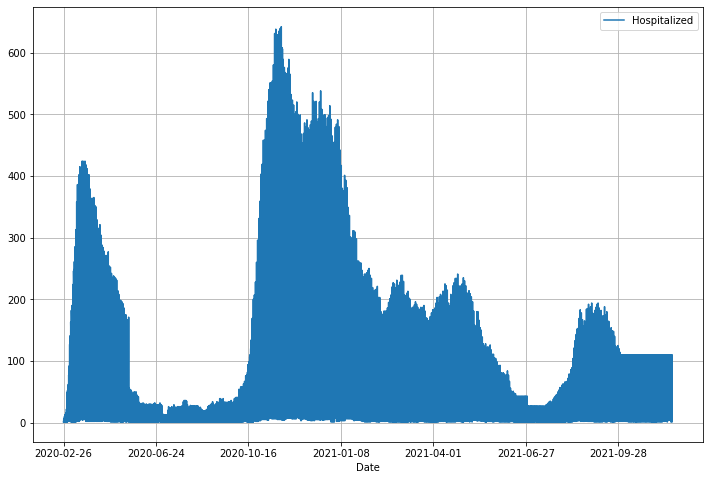

In [19]:
swissData.plot.line('Date', ['Hospitalized'], grid = True, figsize=(12, 8))

In [20]:
#The seasons in Switzerland are winter (mid December to mid March), summer (mid June to mid September)
summer_start_date = '2020-06-15'
summer_end_date   = '2020-09-15'
swiss_summer_data = swissData.query('Date >= @summer_start_date and Date <= @summer_end_date')

In [21]:
winter_start_date = '2020-12-15'
winter_end_date   = '2021-03-15'
swiss_winter_data = swissData.query('Date >= @winter_start_date and Date <= @winter_end_date')

In [22]:
#Calculating the mean and sum of Hospitalised patients in Summer
swiss_summer_data_mean = swiss_summer_data[['Hospitalized']].mean()
swiss_summer_data_sum = swiss_summer_data[['Hospitalized']].sum()
print(f'The mean of hospitalized patient in the summer time is',swiss_summer_data_mean,'\nand the sum is',swiss_summer_data_sum)

The mean of hospitalized patient in the summer time is Hospitalized    6.609459
dtype: float64 
and the sum is Hospitalized    9782.0
dtype: float64


In [23]:
#Calculating the mean and sum of Hospitalised patients in Winter
swiss_winter_data_mean = swiss_winter_data[['Hospitalized']].mean()
swiss_winter_data_sum = swiss_winter_data[['Hospitalized']].sum()
print(f'The mean of hospitalized patient in the winter time is',swiss_winter_data_mean,'\nand the sum is',swiss_winter_data_sum)

The mean of hospitalized patient in the winter time is Hospitalized    66.849845
dtype: float64 
and the sum is Hospitalized    150479.0
dtype: float64


## For every country calculate average number of currently positive patients
## What is the country with most average active currently positive cases?
## Solve with Pandas and measure the execution time

The average number of positive patients for all the countries is as follows
 CountryName
Afghanistan       58080.793162
Albania            6073.133333
Algeria           84558.510239
American Samoa        0.000000
Andorra            7050.146199
                      ...     
Western Sahara      579.110320
Whole Globe        2134.759615
Yemen              3610.383333
Zambia            64268.828319
Zimbabwe          33578.600355
Name: CumulativePositive, Length: 221, dtype: float64 

The execution time required is,
 0.26735568046569824 



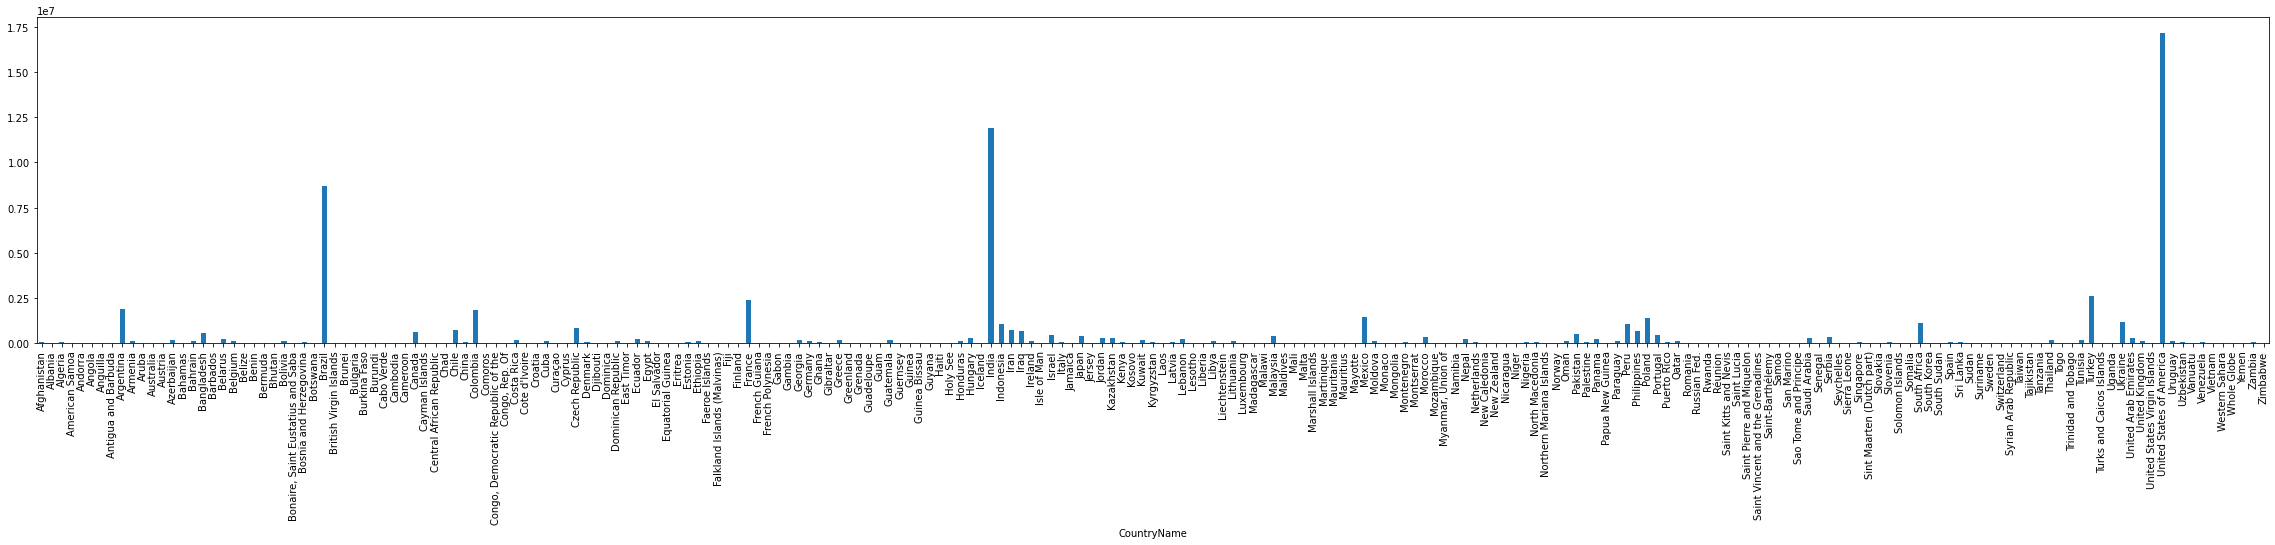

In [24]:
import time

start = time.time()

covid_countries = covid.groupby(["CountryName"])
print(f'The average number of positive patients for all the countries is as follows\n',covid_countries.CumulativePositive.mean(),'\n')
covid_countries.CumulativePositive.mean().plot(kind='bar', figsize= (40,6))

end = time.time()
print(f'The execution time required is,\n',end - start,'\n')

###From the above visualization we can see that United States of America have the highest average of currently positive cases.

# PySpark

In [25]:
#solve this part in PySpark on Google colab or your own machine (if you have PySpark set up)
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import sum, col, desc, max


# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=d798a574f5dc64f3b57e4d24cf7f2c036a8474b8f9700fdf7d681317ebb56c9b
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

## For every country calculate average number of curently positive patients
## What is the country with most average active curently positive cases?
## Solve by Map-Reduce and measure the execution time

In [26]:
import time

ds = spark.read.csv(path='/content/drive/MyDrive/bda/COVID.csv', sep=',',encoding='UTF-8',comment=None, header=True,inferSchema=True)

# view row count
ds.count()

327686

In [27]:
# View the first 5 rows of data
ds.show(5)


+-------------------+----+--------------------+------+----------+----------+------------------+------------------+-------------------+-----------------+------------+-------------+---------+------------+----+
|               Date|iso3|         CountryName|Region|       lat|       lon|CumulativePositive|CumulativeDeceased|CumulativeRecovered|CurrentlyPositive|Hospitalized|IntensiveCare|EUcountry|EUCPMcountry|NUTS|
+-------------------+----+--------------------+------+----------+----------+------------------+------------------+-------------------+-----------------+------------+-------------+---------+------------+----+
|2020-01-03 00:00:00| AIA|            Anguilla|  null|  18.22512| -63.07213|                 0|                 0|               null|                0|        null|         null|    false|       false|  AI|
|2020-01-03 00:00:00| DMA|            Dominica|  null| 15.416749| -61.36413|                 0|                 0|               null|                0|        null|   

In [28]:

# View information about each column
ds.printSchema()


root
 |-- Date: timestamp (nullable = true)
 |-- iso3: string (nullable = true)
 |-- CountryName: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- CumulativePositive: integer (nullable = true)
 |-- CumulativeDeceased: integer (nullable = true)
 |-- CumulativeRecovered: integer (nullable = true)
 |-- CurrentlyPositive: integer (nullable = true)
 |-- Hospitalized: integer (nullable = true)
 |-- IntensiveCare: integer (nullable = true)
 |-- EUcountry: boolean (nullable = true)
 |-- EUCPMcountry: boolean (nullable = true)
 |-- NUTS: string (nullable = true)



In [29]:
start_time = time.time()

# Serialize to generate rdd
rdd = sc.textFile('COVID.csv')
#rdd.first()

#For every country calculate average number of curently positive patients in descending order
covid1 = ds.groupby(["CountryName"])
covid1.avg("CumulativePositive").sort(desc("avg(CumulativePositive)")).show()

end_time = time.time()
print("The program has been executed for %f seconds"%(end_time - start_time))

+--------------------+-----------------------+
|         CountryName|avg(CumulativePositive)|
+--------------------+-----------------------+
|United States of ...|    1.716260176935484E7|
|               India|   1.1883272734527687E7|
|              Brazil|      8696055.335051546|
|              Turkey|     2595367.4485165793|
|              France|     2394905.6159052453|
|           Argentina|     1901747.2443674176|
|            Colombia|      1873675.731707317|
|              Mexico|     1441664.5456110155|
|              Poland|     1420315.8845500848|
|             Ukraine|     1164397.0800711743|
|        South Africa|      1133636.596187175|
|           Indonesia|     1092445.8914728682|
|                Peru|     1080379.9668989547|
|      Czech Republic|      831879.8876221499|
|               Chile|      743993.1681109185|
|                Iran|      718223.9510086456|
|                Iraq|      680964.5938566553|
|         Philippines|      670873.2561174552|
|            

United States of America has the highest average of active positive cases.

Spark doesn't implement MapReduce.
Maps take data as input and then transform that data with whatever function you put in the map. They are like directions for the data telling how each input should get to the output.

In [30]:
ds.select('CumulativePositive').collect()
ds.select('CumulativePositive').groupby('CumulativePositive').count().first()
ds.describe()

DataFrame[summary: string, iso3: string, CountryName: string, Region: string, lat: string, lon: string, CumulativePositive: string, CumulativeDeceased: string, CumulativeRecovered: string, CurrentlyPositive: string, Hospitalized: string, IntensiveCare: string, NUTS: string]

# Dask

In [31]:
!python -m pip install dask[dataframe] --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2022.2.1
    Uninstalling dask-2022.2.1:
      Successfully uninstalled dask-2022.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.2.1 requires dask==2022.02.1, but you have dask 2022.12.1 which is incompatible.


In [32]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import dask
import numpy as np
import dask.array as da
import dask.dataframe as dd
from dask.diagnostics import ProgressBar 

In [35]:
print(f"Dask   version: {dask.__version__}")
print(f"Numpy version:  {np.__version__}")

Dask   version: 2022.12.1
Numpy version:  1.21.6


In [36]:
start_time = time.time()
df = dd.read_csv('/content/drive/MyDrive/bda/COVID.csv', sample=25000000, dtype={'CumulativePositive': 'float64'})
df.dtypes

Date                    object
iso3                    object
CountryName             object
Region                 float64
lat                    float64
lon                    float64
CumulativePositive     float64
CumulativeDeceased       int64
CumulativeRecovered    float64
CurrentlyPositive        int64
Hospitalized           float64
IntensiveCare          float64
EUcountry                 bool
EUCPMcountry              bool
NUTS                    object
dtype: object

## Error if dtype={'CumulativePositive': 'float64'} is not used:
Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+--------------------+---------+----------+
| Column             | Found   | Expected |
+--------------------+---------+----------+
| CumulativePositive | float64 | int64    |
+--------------------+---------+----------+

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CumulativePositive': 'float64'}

to the call to `read_csv`/`read_table`.

Alternatively, provide `assume_missing=True` to interpret
all unspecified integer columns as floats.

## For every country calculate average number of curently positive patients

In [37]:
df1 = df.groupby('CountryName').CumulativePositive.mean().compute()

In [38]:
df1

CountryName
Afghanistan       58080.793162
Albania            6073.133333
Algeria           84558.510239
American Samoa        0.000000
Andorra            7050.146199
                      ...     
Western Sahara      579.110320
Whole Globe        2134.759615
Yemen              3610.383333
Zambia            64268.828319
Zimbabwe          33578.600355
Name: CumulativePositive, Length: 221, dtype: float64

What is the country wiht most avreage active curently positive cases?
Solve by Dask and measure the execution time

In [39]:
df2 = df1.sort_values() 
df2 

CountryName
American Samoa              0.000000e+00
Samoa                       1.000000e+00
Vanuatu                     2.016807e+00
Marshall Islands            3.760956e+00
Saint-Barthélemy            6.000000e+00
                                ...     
France                      2.394906e+06
Turkey                      2.595367e+06
Brazil                      8.696055e+06
India                       1.188327e+07
United States of America    1.716260e+07
Name: CumulativePositive, Length: 221, dtype: float64

In [40]:
df1.max()

17162601.76935484

United States of America has the highest mean average positive cases 17162601.76935484

In [41]:
end_time = time.time()

In [42]:
print("The program has been executed for %f seconds"%(end_time - start_time))

The program has been executed for 0.623794 seconds


## Create a monte carlo integration of any function F: R - R^n.

$$
\int_a^b f(x) \;dx = \int_a^b (x^n) \;dx
$$
where n is the number of samples

In [43]:
start_time = time.time()
def func1(x):
    # function f(x)=x^2
    return x**2
  
def mc_integrate(func, a, b, n = 100000):
    # Monte Carlo integration between x1 and x2 of given function from a to b
    
    vals = np.random.uniform(a, b, n)
    y = [func(val) for val in vals]
    
    y_mean = np.sum(y)/n
    integ = (b-a) * y_mean
    
    return integ

print(f"Monte Carlo solution: {mc_integrate(func1, -2, 2, 20000000): .4f}")
end_time = time.time()
print("The Monte Carlo integration has been executed for %f seconds"%(end_time - start_time))

Monte Carlo solution:  5.3332
The Monte Carlo integration has been executed for 8.775298 seconds
